In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException
import pandas as pd
from matplotlib import pyplot as plt
import time

In [2]:
options = Options()
#options.headless = True # no GUI (on VM)
b = webdriver.Chrome(options=options)

In [3]:
url = "https://tyler.caraza-harter.com/cs320/f20/materials/lec-16/page4.html"
b.get(url)

In [4]:
year_txt = b.find_element_by_id("year")
btn = b.find_element_by_id("search_btn")

In [5]:
def get_count(year):
    year_txt.clear()
    year_txt.send_keys(str(year))
    btn.click()
    return len(b.find_elements_by_tag_name("tr")) - 1
    
get_count(1954)

-1

In [6]:
s = pd.Series(dtype=int)
for year in range(1950, 2020):
    s.loc[year] = get_count(year)
s

1950    3
1951    0
1952    1
1953    2
1954    2
       ..
2015    2
2016    2
2017    4
2018    4
2019    0
Length: 70, dtype: int64

In [7]:
%matplotlib inline

In [8]:
plt.rcParams["font.size"] = 16

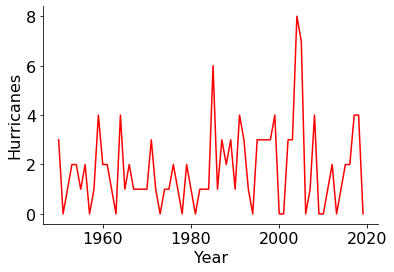

In [9]:
ax = s.plot.line(color="red")
ax.set_xlabel("Year")
ax.set_ylabel("Hurricanes")
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

In [10]:
b.close()